# Exploratory data analysis

### Проверка данных на адекватность

In [1]:
import pandas as pd
import zipfile
from tqdm.notebook import tqdm
import folium
import branca.colormap as cm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Данные

In [3]:
path_to_train = '../data/train.csv.zip'

In [4]:
zip_file = zipfile.ZipFile(path_to_train)
train_df = pd.read_csv(zip_file.open(zip_file.namelist()[0]))

/home/alitvintsev/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
train_df.shape[0]

279792

In [6]:
train_df.columns

Index(['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in

In [7]:
train_df.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [8]:
train_df.tail()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
279787,Томск,1.0,COL_280111,56.459183,84.979334,2,33,111,222,0,0,1,1,1,9,24,45,3.614641,Томск,576624.0,0.116917,0,13,32,62,0,1,1,2,0,1,3,8,0,2,4,1,2,6,2,4,6,1,3,14,0,0,1,6,0,16,67,130,201.668316,0.897445,0,0,0,0.309002,5,20,37,54278.287605,198,62,3008.0,979.0,5.714286,5.882353,1972.260870,1973.460000,Томская область,358.320073,S11114,2020-08-23,10,1
279788,Санкт-Петербург,1.0,COL_280479,59.936954,30.356383,10,274,718,1340,0,2,5,16,2,96,282,497,2.063594,Санкт-Петербург,5381736.0,0.110570,0,24,89,182,0,18,38,62,0,6,26,43,13,34,57,5,19,36,27,84,141,9,22,40,2,23,86,178,5,136,370,750,0.748926,1.188643,0,0,0,0.204208,7,38,73,595298.017731,410,80,7661.0,1659.0,4.719388,4.706667,1876.994898,1873.186667,Санкт-Петербург,119.637556,S28440,2020-08-23,110,1
279789,Калининград,3.0,COL_280518,54.729233,20.514968,0,12,34,84,0,2,2,2,0,2,6,22,2.126417,Калининград,453461.0,0.108723,1,14,27,55,0,0,1,1,0,0,0,3,0,1,2,5,5,5,0,2,5,0,1,3,0,3,5,9,0,5,20,43,814.733428,1.117929,0,0,0,0.092370,11,14,31,35758.847259,136,37,1225.0,460.0,3.950413,4.885714,1964.258333,1970.571429,Калининградская область,312.789725,S6671,2020-08-23,10,1
279790,Кемерово,1.0,COL_280529,55.360680,86.081460,5,57,100,134,0,0,0,0,1,16,32,41,0.844577,Кемерово,558662.0,0.341931,0,10,12,20,1,3,5,7,1,4,6,7,1,3,3,1,7,9,0,0,1,1,4,7,0,2,9,12,1,23,32,48,200.109079,2.073608,0,0,0,0.385545,3,14,18,38755.038322,94,24,1649.0,429.0,4.691489,4.125000,1957.425532,1954.625000,Кемеровская область,89.201305,S17667,2020-08-23,110,1
279791,Киров,1.0,COL_280637,58.592915,49.677439,1,23,64,113,0,0,0,0,0,1,11,25,1.317512,Киров,496986.0,0.126115,0,6,18,48,0,0,0,1,0,6,9,12,3,4,5,0,1,2,1,1,3,1,1,4,0,0,4,7,1,10,37,61,306.460323,1.998461,0,0,0,0.148057,4,12,19,41335.014762,249,79,2735.0,766.0,5.069124,4.776119,1972.599078,1971.794118,Кировская область,172.855871,S5611,2020-08-23,110,1


In [9]:
train_df['date'].min()

'2020-01-05'

In [10]:
train_df['date'].max()

'2020-08-23'

In [11]:
train_df['per_square_meter_price'].min()

389.6103896103896

In [12]:
train_df['per_square_meter_price'].max()

1990000.0

<AxesSubplot:ylabel='Frequency'>

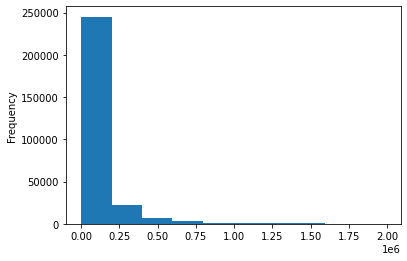

In [24]:
train_df['per_square_meter_price'].plot(kind='hist')

In [26]:
train_df['per_square_meter_price'].describe()

count    2.797920e+05
mean     1.101955e+05
std      1.720506e+05
min      3.896104e+02
25%      2.970149e+04
50%      5.971068e+04
75%      1.193000e+05
max      1.990000e+06
Name: per_square_meter_price, dtype: float64

In [27]:
train_df[train_df['city']=='Санкт-Петербург']['per_square_meter_price'].mean()

154592.36247230694

In [28]:
train_df[train_df['city']=='Москва']['per_square_meter_price'].mean()

296617.45431453624

### Карта

In [21]:
fmap = folium.Map(location=[train_df.lat.mean(), 
                           train_df.lng.mean()], zoom_start=8, control_scale=True)

colormap = cm.LinearColormap(colors=['lightblue', 'red'], vmin=0, vmax=2000000)

In [22]:
for index, point in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    folium.CircleMarker([point["lat"], point["lng"]], size=6, 
                         fill_color=colormap(point['per_square_meter_price'])).add_to(fmap)

  0%|          | 0/279792 [00:00<?, ?it/s]

In [25]:
# fmap